# Bias Variance Tradeoff

#### Error due to Bias: 
The error due to bias is taken as the difference between the expected (or average) prediction of our model and the correct value which we are trying to predict. 

#### Error due to Variance: 
The error due to variance is taken as the variability of a model prediction for a given data point.


A core concept in machine learning is the Bias Variance trade off. Essentially, as a model becomes more complex, it more adequately captures reality (reduces bias), but becomes sesitive to changes in our dataset (variance). Conversely, a less complex model is more robust to changes in our dataest, but less able to capture the true structure of our data's relationship, increasing bias but reducing variance.


### Example:
In the following example, notice how the test and validation errors diverge as the number of neighbors decreases to one. The case where n_neighbors = 1 is a case of extremeley high variance, but little bias. In other words, the model is overfitting on its training set, which doesn't allow it to generalize well to its test set.

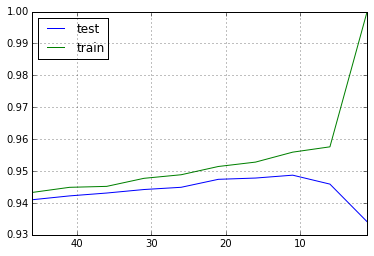

In [25]:
%matplotlib inline

import numpy as np
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier


# Set seed to reproduce results
np.random.seed(10)

# Make 
X, y = make_classification(n_samples=10000, n_features=10, n_informative=5, n_redundant=2, n_repeated=0, n_classes=2)

# Fewer neighbors implies more complexity
n_range = range(1, 51, 5)[::-1]

train, test = validation_curve(KNeighborsClassifier(), X, y, param_name="n_neighbors", param_range=n_range, cv=10)
# Take means over cross validation folds
train = np.mean(train, axis=1)
test = np.mean(test, axis=1)


val_df = pd.DataFrame({'train':train, 'test':test}, index=n_range)
val_df.plot()